In [47]:
#this google colab file for data analysis project
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#importing all libraries for the processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [62]:
df = pd.read_csv('//content/drive/MyDrive/ds_lab/project_ds - project_ds.csv', parse_dates=['DATE'])

In [63]:
df.head(12)

,DATE,STUDENT NAME,VISITING PLACE,OUT TIME,RETURNED DATE,ON TIME,out_time_new,on_time_new,Time Difference,Time Difference (Hour),Hostel stay,yr_study,VISITING_PLACE_NUMBER,Cluster
0,2023-11-01,Nitin,Kandigai,7:20:00 AM,11-1-2023,8:20:00 AM,7:20,8:20,0 days 01:00:00,1.000000,Ashoka,4th,6,0
1,2023-11-01,Narsimha,Kandigai,7:20:00 AM,11-1-2023,12:55:00 PM,7:20,12:55,0 days 05:35:00,5.583333,Ashwatha,4th,6,0
2,2023-11-01,Dhanraj K,Home,8:30:00 AM,11-1-2023,5:00:00 PM,8:30,17:00,0 days 08:30:00,10.500000,Ashoka,3rd,4,1
3,2023-11-01,Hari Krishna,Kandigai,9:00:00 AM,11-1-2023,10:00:00 AM,9:00,10:00,0 days 01:00:00,1.000000,Jasmine Annex,2nd,6,0
4,2023-11-01,Vignesh,Home,9:15:00 AM,11-1-2023,9:50:00 AM,9:15,9:50,0 days 00:35:00,0.583333,Ashwatha,4th,4,0
5,2023-11-01,Rahul,Kandigai,9:15:00 AM,11-1-2023,9:50:00 AM,9:15,9:50,0 days 00:35:00,0.583333,Jasmine Annex,2nd,6,0
6,2023-11-01,Mohit,Kandigai,9:15:00 AM,11-1-2023,9:50:00 AM,9:15,9:50,0 days 00:35:00,0.583333,Ashoka,1st,6,0
7,2023-11-01,Udil,Kandigai,9:15:00 AM,11-1-2023,9:50:00 AM,9:15,9:50,0 days 00:35:00,0.583333,Jasmine Annex,3rd,6,0
8,2023-11-01,Chandan,Kandigai,9:20:00 AM,11-1-2023,10:30:00 AM,9:20,10:30,0 days 01:10:00,1.166667,Jasmine Annex,2nd,6,0
9,2023-11-01,Jagan,Tagore,9:20:00 AM,11-1-2023,9:27:00 AM,9:20,13:27,0 days 04:07:00,4.116667,Ashwatha,1st,10,2


In [64]:
old_name = 'kandigai'
new_name = 'Kandigai'
df['VISITING PLACE'] = df['VISITING PLACE'].replace(old_name, new_name)

old_name = 'Kandigar'
new_name = 'Kandigai'
df['VISITING PLACE'] = df['VISITING PLACE'].replace(old_name, new_name)

old_name = 'Tagore medical'
new_name = 'Tagore'
df['VISITING PLACE'] = df['VISITING PLACE'].replace(old_name, new_name)

old_name = 'Tagore Hospital'
new_name = 'Tagore'
df['VISITING PLACE'] = df['VISITING PLACE'].replace(old_name, new_name)

old_name = 'Pandian'
new_name = 'Kandigai'
df['VISITING PLACE'] = df['VISITING PLACE'].replace(old_name, new_name)

old_name = 'Milano'
new_name = 'Kandigai'
df['VISITING PLACE'] = df['VISITING PLACE'].replace(old_name, new_name)

old_name = 'Shop'
new_name = 'Kandigai'
df['VISITING PLACE'] = df['VISITING PLACE'].replace(old_name, new_name)


old_name = 'Print Shop'
new_name = 'Kandigai'
df['VISITING PLACE'] = df['VISITING PLACE'].replace(old_name, new_name)


old_name = 'Admin'
new_name = 'Kandigai'
df['VISITING PLACE'] = df['VISITING PLACE'].replace(old_name, new_name)

df.to_csv('/content/drive/MyDrive/ds_lab/project_ds - project_ds.csv', index=False)


In [65]:
new_df = df.dropna()

In [66]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    188 non-null    datetime64[ns]
 1   STUDENT NAME            188 non-null    object        
 2   VISITING PLACE          188 non-null    object        
 3   OUT TIME                188 non-null    object        
 4   RETURNED DATE           188 non-null    object        
 5   ON TIME                 188 non-null    object        
 6   out_time_new            188 non-null    object        
 7   on_time_new             188 non-null    object        
 8   Time Difference         188 non-null    object        
 9   Time Difference (Hour)  188 non-null    float64       
 10  Hostel stay             188 non-null    object        
 11  yr_study                188 non-null    object        
 12  VISITING_PLACE_NUMBER   188 non-null    int64     

In [67]:
new_df.dtypes

DATE                      datetime64[ns]
STUDENT NAME                      object
VISITING PLACE                    object
OUT TIME                          object
RETURNED DATE                     object
ON TIME                           object
out_time_new                      object
on_time_new                       object
Time Difference                   object
Time Difference (Hour)           float64
Hostel stay                       object
yr_study                          object
VISITING_PLACE_NUMBER              int64
Cluster                            int64
dtype: object

In [68]:
new_df['DATE'] = pd.to_datetime(new_df['DATE'])
print(new_df.head())

        DATE  STUDENT NAME VISITING PLACE    OUT TIME RETURNED DATE  \
0 2023-11-01         Nitin       Kandigai  7:20:00 AM     11-1-2023   
1 2023-11-01      Narsimha       Kandigai  7:20:00 AM     11-1-2023   
2 2023-11-01     Dhanraj K           Home  8:30:00 AM     11-1-2023   
3 2023-11-01  Hari Krishna       Kandigai  9:00:00 AM     11-1-2023   
4 2023-11-01       Vignesh           Home  9:15:00 AM     11-1-2023   

       ON TIME out_time_new on_time_new  Time Difference  \
0   8:20:00 AM         7:20        8:20  0 days 01:00:00   
1  12:55:00 PM         7:20       12:55  0 days 05:35:00   
2   5:00:00 PM         8:30       17:00  0 days 08:30:00   
3  10:00:00 AM         9:00       10:00  0 days 01:00:00   
4   9:50:00 AM         9:15        9:50  0 days 00:35:00   

   Time Difference (Hour)    Hostel stay yr_study  VISITING_PLACE_NUMBER  \
0                1.000000         Ashoka      4th                      6   
1                5.583333       Ashwatha      4th           

In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    188 non-null    datetime64[ns]
 1   STUDENT NAME            188 non-null    object        
 2   VISITING PLACE          188 non-null    object        
 3   OUT TIME                188 non-null    object        
 4   RETURNED DATE           188 non-null    object        
 5   ON TIME                 188 non-null    object        
 6   out_time_new            188 non-null    object        
 7   on_time_new             188 non-null    object        
 8   Time Difference         188 non-null    object        
 9   Time Difference (Hour)  188 non-null    float64       
 10  Hostel stay             188 non-null    object        
 11  yr_study                188 non-null    object        
 12  VISITING_PLACE_NUMBER   188 non-null    int64     

In [70]:
new_df.shape

(188, 14)

In [71]:
new_df['on_time_new'] = pd.to_datetime(df['ON TIME'], format='%I:%M:%S %p')
new_df['out_time_new'] = pd.to_datetime(df['OUT TIME'], format='%I:%M:%S %p')

In [72]:
new_df.head()

,DATE,STUDENT NAME,VISITING PLACE,OUT TIME,RETURNED DATE,ON TIME,out_time_new,on_time_new,Time Difference,Time Difference (Hour),Hostel stay,yr_study,VISITING_PLACE_NUMBER,Cluster
0,2023-11-01,Nitin,Kandigai,7:20:00 AM,11-1-2023,8:20:00 AM,1900-01-01 07:20:00,1900-01-01 08:20:00,0 days 01:00:00,1.000000,Ashoka,4th,6,0
1,2023-11-01,Narsimha,Kandigai,7:20:00 AM,11-1-2023,12:55:00 PM,1900-01-01 07:20:00,1900-01-01 12:55:00,0 days 05:35:00,5.583333,Ashwatha,4th,6,0
2,2023-11-01,Dhanraj K,Home,8:30:00 AM,11-1-2023,5:00:00 PM,1900-01-01 08:30:00,1900-01-01 17:00:00,0 days 08:30:00,10.500000,Ashoka,3rd,4,1
3,2023-11-01,Hari Krishna,Kandigai,9:00:00 AM,11-1-2023,10:00:00 AM,1900-01-01 09:00:00,1900-01-01 10:00:00,0 days 01:00:00,1.000000,Jasmine Annex,2nd,6,0
4,2023-11-01,Vignesh,Home,9:15:00 AM,11-1-2023,9:50:00 AM,1900-01-01 09:15:00,1900-01-01 09:50:00,0 days 00:35:00,0.583333,Ashwatha,4th,4,0


In [73]:
new_df['Time Difference'] = new_df['on_time_new'] - new_df['out_time_new']

In [74]:
n2_df = new_df
n2_df = n2_df[n2_df['OUT TIME'] != '-']
n2_df = n2_df[n2_df['ON TIME'] != '-']

In [75]:
label_encoder = LabelEncoder()
n2_df['VISITING_PLACE_NUMBER'] = label_encoder.fit_transform(n2_df['VISITING PLACE'])

In [76]:
n2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   DATE                    188 non-null    datetime64[ns] 
 1   STUDENT NAME            188 non-null    object         
 2   VISITING PLACE          188 non-null    object         
 3   OUT TIME                188 non-null    object         
 4   RETURNED DATE           188 non-null    object         
 5   ON TIME                 188 non-null    object         
 6   out_time_new            188 non-null    datetime64[ns] 
 7   on_time_new             188 non-null    datetime64[ns] 
 8   Time Difference         188 non-null    timedelta64[ns]
 9   Time Difference (Hour)  188 non-null    float64        
 10  Hostel stay             188 non-null    object         
 11  yr_study                188 non-null    object         
 12  VISITING_PLACE_NUMBER   188 non-null

In [77]:
n2_df.nunique()

DATE                        3
STUDENT NAME              166
VISITING PLACE             12
OUT TIME                   68
RETURNED DATE               5
ON TIME                    77
out_time_new               68
on_time_new                77
Time Difference            75
Time Difference (Hour)     76
Hostel stay                 3
yr_study                    4
VISITING_PLACE_NUMBER      12
Cluster                     4
dtype: int64

In [78]:
n2_df.describe()

,Time Difference,Time Difference (Hour),VISITING_PLACE_NUMBER,Cluster
count,188,188.000000,188.000000,188.000000
mean,0 days 01:54:13.085106382,2.127039,5.313830,0.367021
std,0 days 02:28:17.880601653,2.760773,1.534773,0.806642
min,0 days 00:00:00,0.000000,0.000000,0.000000
25%,0 days 00:40:00,0.750000,5.000000,0.000000
50%,0 days 01:00:00,1.033333,5.000000,0.000000
75%,0 days 02:05:00,2.583333,5.000000,0.000000
max,0 days 15:05:00,15.083333,11.000000,3.000000


In [79]:
n2_df['Time Difference (Hour)'] = (n2_df['on_time_new'] - n2_df['out_time_new']).dt.total_seconds() / 3600

In [80]:
n2_df.head()

,DATE,STUDENT NAME,VISITING PLACE,OUT TIME,RETURNED DATE,ON TIME,out_time_new,on_time_new,Time Difference,Time Difference (Hour),Hostel stay,yr_study,VISITING_PLACE_NUMBER,Cluster
0,2023-11-01,Nitin,Kandigai,7:20:00 AM,11-1-2023,8:20:00 AM,1900-01-01 07:20:00,1900-01-01 08:20:00,0 days 01:00:00,1.000000,Ashoka,4th,5,0
1,2023-11-01,Narsimha,Kandigai,7:20:00 AM,11-1-2023,12:55:00 PM,1900-01-01 07:20:00,1900-01-01 12:55:00,0 days 05:35:00,5.583333,Ashwatha,4th,5,0
2,2023-11-01,Dhanraj K,Home,8:30:00 AM,11-1-2023,5:00:00 PM,1900-01-01 08:30:00,1900-01-01 17:00:00,0 days 08:30:00,8.500000,Ashoka,3rd,3,1
3,2023-11-01,Hari Krishna,Kandigai,9:00:00 AM,11-1-2023,10:00:00 AM,1900-01-01 09:00:00,1900-01-01 10:00:00,0 days 01:00:00,1.000000,Jasmine Annex,2nd,5,0
4,2023-11-01,Vignesh,Home,9:15:00 AM,11-1-2023,9:50:00 AM,1900-01-01 09:15:00,1900-01-01 09:50:00,0 days 00:35:00,0.583333,Ashwatha,4th,3,0


In [81]:
n2_df.groupby('VISITING PLACE')['Time Difference (Hour)'].sum()

VISITING PLACE
Bank ( SBI )         1.133333
Chennai Central      4.833333
Guindy               0.833333
Home                33.616667
Intern              18.666667
Kandigai           217.883333
Marina Mall         12.400000
Mosque               1.783333
Navalur             11.900000
Tagore              48.050000
Tambaram             2.616667
VIT                  4.166667
Name: Time Difference (Hour), dtype: float64

In [82]:
#Predictive Analysis
X = n2_df[['Time Difference (Hour)']]
y = n2_df['VISITING PLACE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_used = DecisionTreeClassifier()
model_used.fit(X_train, y_train)
y_pred = model_used.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for testing dataset: {accuracy}")

Accuracy for testing dataset: 0.8157894736842105


In [83]:
y_pred_train = model_used.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy for training dataset: {accuracy_train}")

Accuracy for training dataset: 0.9


In [84]:
X = n2_df[['VISITING_PLACE_NUMBER']]
y = n2_df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# mse_2 = mean_squared_error(y_train, y_pred)
# r2 = r2_score(y_test, y_pred)
print("Mean Squared Error for test data:", mse)
# print("Mean Squared Error for trained data:", mse_2)


Mean Squared Error for test data: 0.2866873554763848


In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
X = n2_df[['Time Difference (Hour)']]
y = n2_df['VISITING PLACE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_used = GaussianNB()
model_used.fit(X_train, y_train)
y_pred = model_used.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for testing dataset: {accuracy}")

Accuracy for testing dataset: 0.7368421052631579


In [87]:
from sklearn.neighbors import KNeighborsClassifier
X = n2_df[['Time Difference (Hour)']]
y = n2_df['VISITING PLACE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for testing dataset: {accuracy}")

Accuracy for testing dataset: 0.8157894736842105


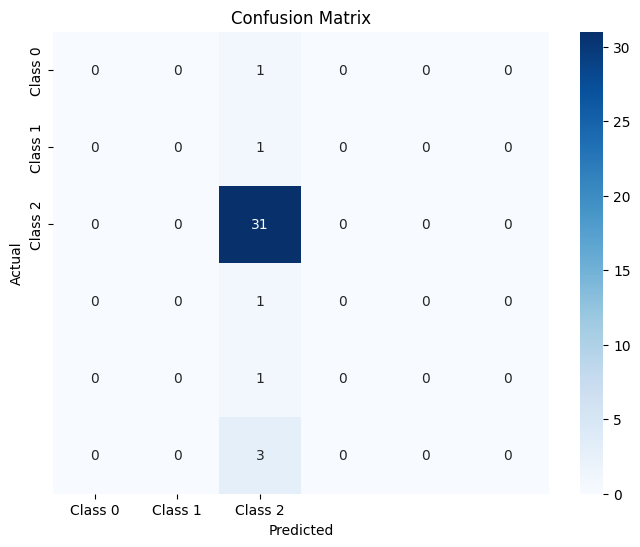

In [88]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-89-43281b936e41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = n2_df.corr()


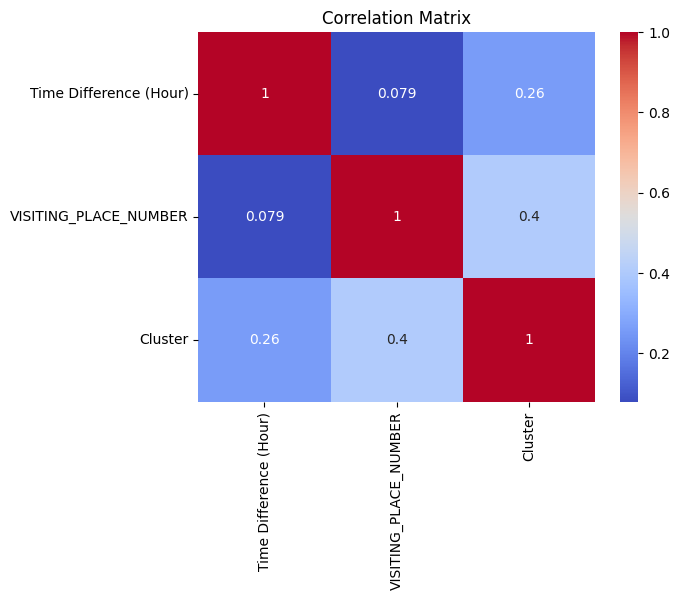

In [89]:
correlation_matrix = n2_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

    VISITING_PLACE_NUMBER Time Difference
0                       0 0 days 01:08:00
1                       1 0 days 04:50:00
2                       2 0 days 00:50:00
3                       3 1 days 09:37:00
4                       4 0 days 18:40:00
5                       5 9 days 01:53:00
6                       6 0 days 12:24:00
7                       7 0 days 01:47:00
8                       8 0 days 11:54:00
9                       9 2 days 00:03:00
10                     10 0 days 02:37:00
11                     11 0 days 04:10:00


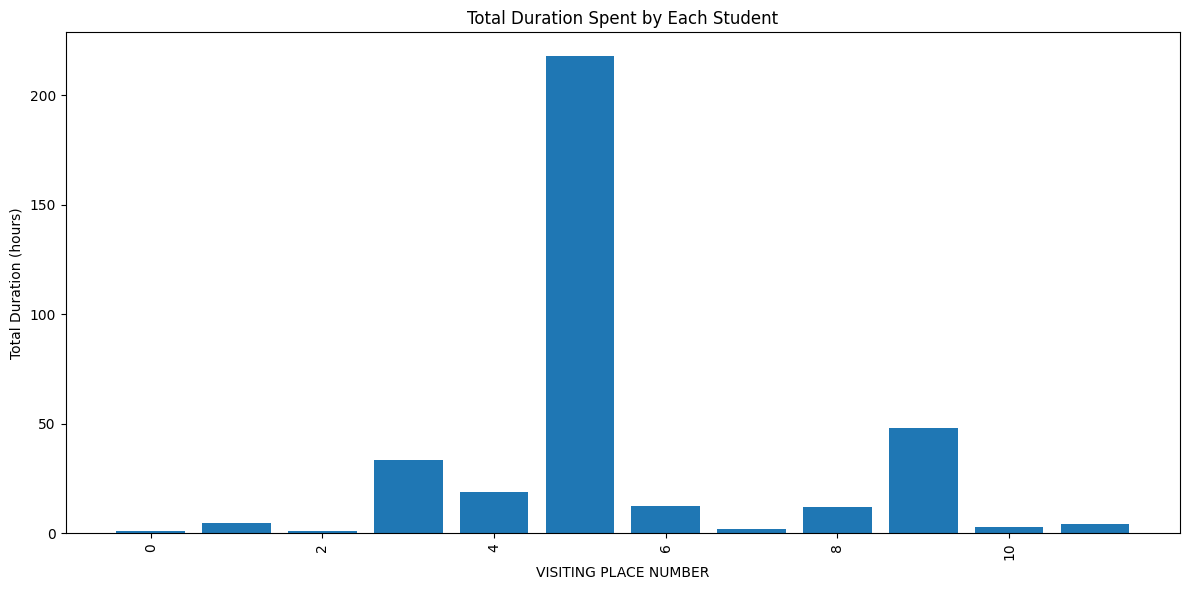

In [90]:
total_duration = n2_df.groupby('VISITING_PLACE_NUMBER')['Time Difference'].sum().reset_index()
print(total_duration)
plt.figure(figsize=(12, 6))
plt.bar(total_duration['VISITING_PLACE_NUMBER'], total_duration['Time Difference'].dt.total_seconds() / 3600)
plt.xticks(rotation=90)
plt.xlabel('VISITING PLACE NUMBER')
plt.ylabel('Total Duration (hours)')
plt.title('Total Duration Spent by Each Student')
plt.tight_layout()
plt.show()

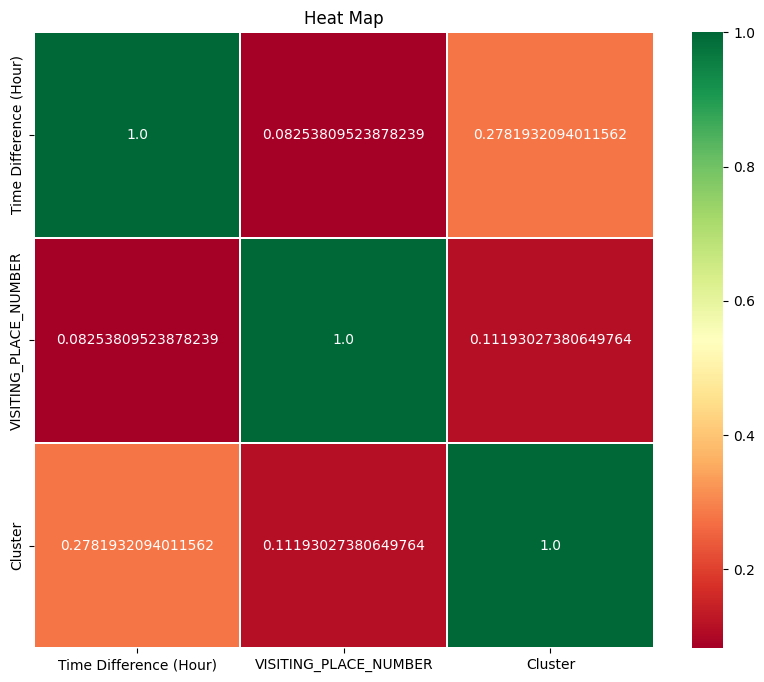

In [91]:
correlation_matrix = df[['Time Difference (Hour)', 'VISITING_PLACE_NUMBER', 'Cluster']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True,fmt="",cmap='RdYlGn',linewidths=0.30)
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heat Map')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


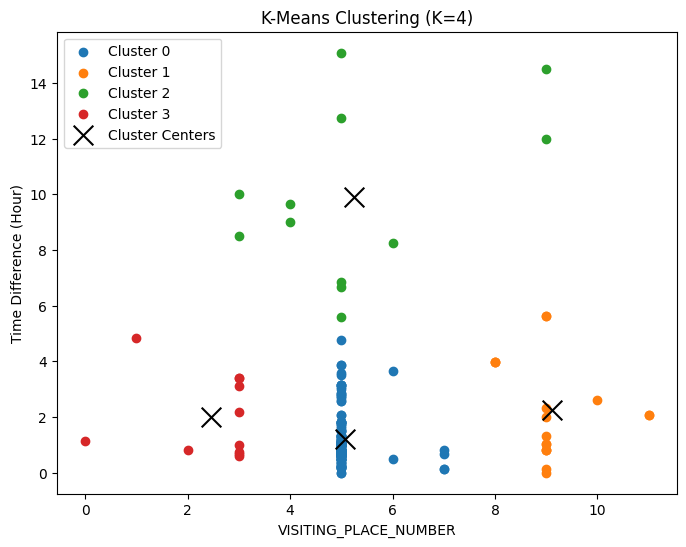

In [92]:
selected_features = ['VISITING_PLACE_NUMBER', 'Time Difference (Hour)']

data = n2_df[selected_features]

scaler = StandardScaler()
data = scaler.fit_transform(data)

n_clusters = 4  # Adjust this based on your dataset and requirements

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(data)

n2_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))

for cluster in range(n_clusters):
    cluster_data = n2_df[n2_df['Cluster'] == cluster]
    plt.scatter(cluster_data['VISITING_PLACE_NUMBER'], cluster_data['Time Difference (Hour)'], label=f'Cluster {cluster}')

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Rescale the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='black', marker='x', label='Cluster Centers')

plt.xlabel('VISITING_PLACE_NUMBER')
plt.ylabel('Time Difference (Hour)')
plt.title(f'K-Means Clustering (K={n_clusters})')
plt.legend()
plt.show()


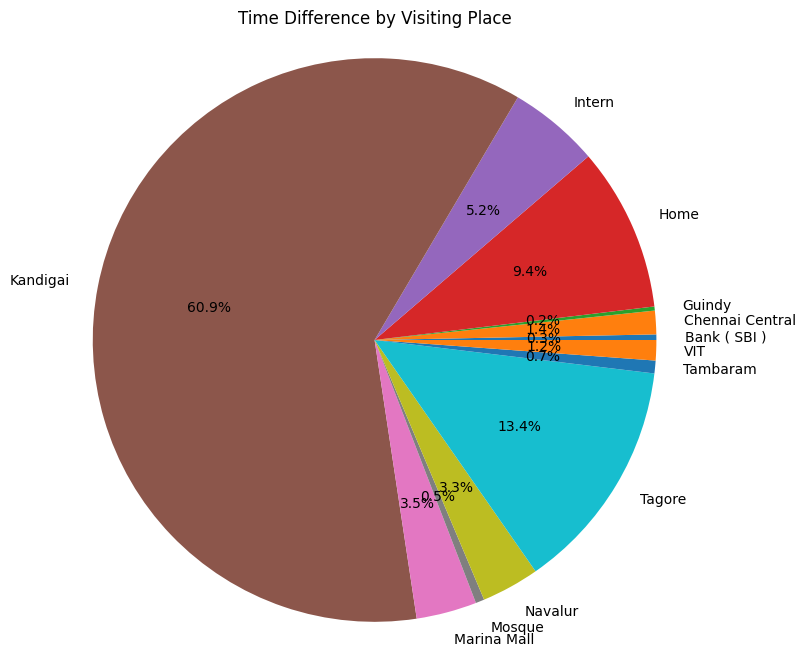

In [93]:
place_time_df = n2_df.groupby('VISITING PLACE')['Time Difference (Hour)'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(place_time_df, labels=place_time_df.index, autopct='%1.1f%%', startangle=0)
plt.title('Time Difference by Visiting Place')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

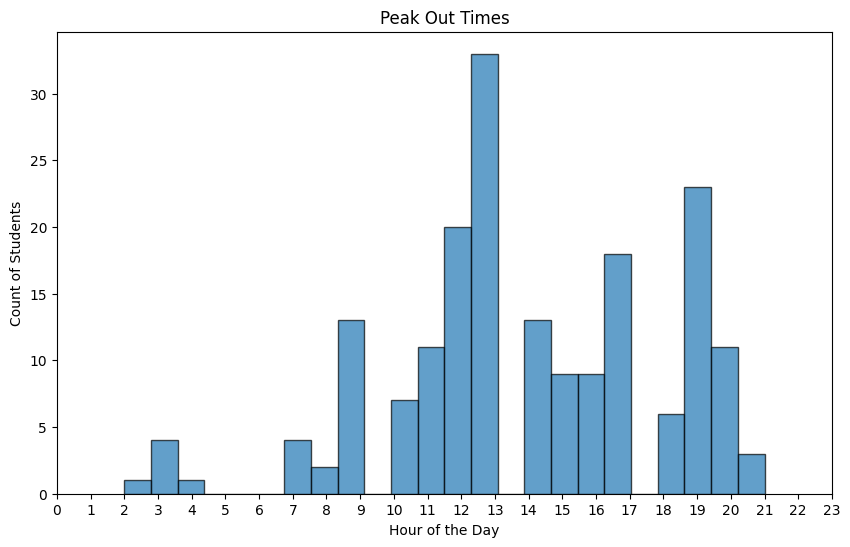

In [94]:
n2_df['Hour'] = n2_df['out_time_new'].dt.hour
plt.figure(figsize=(10, 6))
plt.hist(n2_df['Hour'], bins=24, edgecolor='k', alpha=0.7)
plt.title('Peak Out Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Students')
plt.xticks(range(24))
plt.show()

In [95]:
n2_df.head(3)

,DATE,STUDENT NAME,VISITING PLACE,OUT TIME,RETURNED DATE,ON TIME,out_time_new,on_time_new,Time Difference,Time Difference (Hour),Hostel stay,yr_study,VISITING_PLACE_NUMBER,Cluster,Hour
0,2023-11-01,Nitin,Kandigai,7:20:00 AM,11-1-2023,8:20:00 AM,1900-01-01 07:20:00,1900-01-01 08:20:00,0 days 01:00:00,1.000000,Ashoka,4th,5,0,7
1,2023-11-01,Narsimha,Kandigai,7:20:00 AM,11-1-2023,12:55:00 PM,1900-01-01 07:20:00,1900-01-01 12:55:00,0 days 05:35:00,5.583333,Ashwatha,4th,5,2,7
2,2023-11-01,Dhanraj K,Home,8:30:00 AM,11-1-2023,5:00:00 PM,1900-01-01 08:30:00,1900-01-01 17:00:00,0 days 08:30:00,8.500000,Ashoka,3rd,3,2,8


In [101]:
# n2_df.groupby('Hour')['Hour'].sum()
print(n2_df['Hour'].value_counts().sort_index())
n2_df['hourly_frequency'] = n2_df['Hour'].value_counts().sort_index()

2      1
3      4
4      1
7      4
8      2
9     13
10     7
11    11
12    20
13    33
14    13
15     9
16     9
17    18
18     6
19    23
20    11
21     3
Name: Hour, dtype: int64


In [102]:
from sklearn.impute import SimpleImputer
X = n2_df['Hour']
y = n2_df['hourly_frequency']
X = X.values.reshape(-1, 1)
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)
predict = model.predict(X_test)
mse = mean_squared_error(y_test, predict)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.032055072761476


In [98]:
#convert the date in the out_time_new & on_time_new to 1/11/203

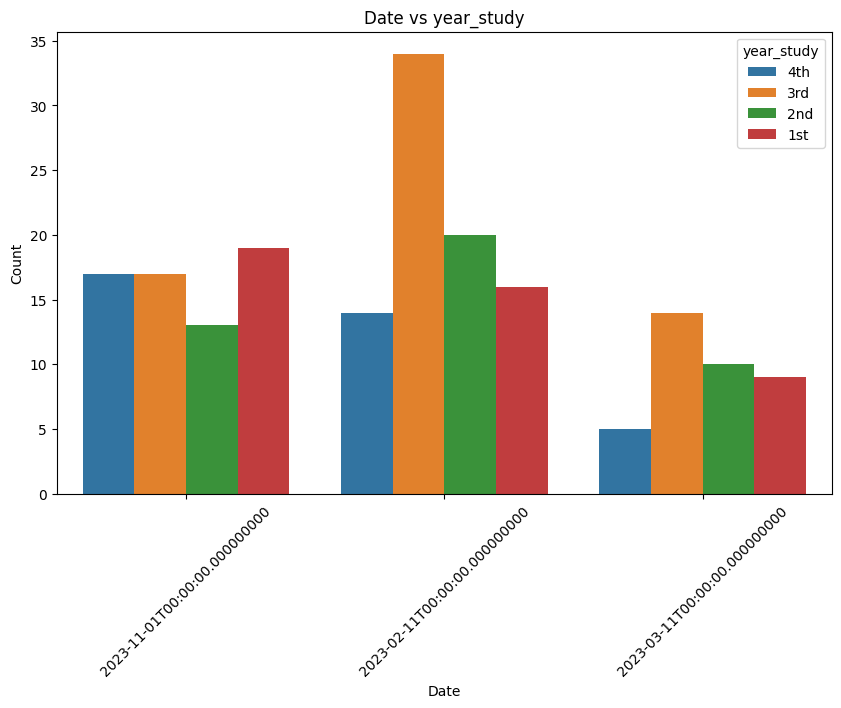

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(data=n2_df, x='DATE', hue='yr_study')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Date vs year_study')
plt.legend(title='year_study')